<a href="https://colab.research.google.com/github/AleFax99/DeepLearning_GroupProject/blob/main/Copy_of_DL_Assignment_baseline_2__IN_USE_with_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dataset

You can download the dataset from {https://darwin.v7labs.com/v7-labs/covid-19-chest-x-ray-dataset?sort=priority\%3Adesc}.
The data entitled as '`darwin dataset pull v7-labs/covid-19-chest-x-ray-dataset:all-images`' will be used in this assignment. All dataset consist of 6504 images from 702 classes. We will extract the images of 4 classes (Bacterial Pneumonia, Viral Pneumonia, No Pneumonia (healthy), Covid-19) and save them as .npy file with the following code:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# %cd /content/drive/MyDrive/Deep Learning - Group Project 
#### Andreea Gdrive path

In [2]:
%cd /content/drive/MyDrive/Deep Learning - Group Project
!pwd

/content/drive/.shortcut-targets-by-id/1qsBT4V5PUBeJK1UavH8V46pQAoKjtkPa/Deep Learning - Group Project
/content/drive/.shortcut-targets-by-id/1qsBT4V5PUBeJK1UavH8V46pQAoKjtkPa/Deep Learning - Group Project


In [3]:
import numpy as np
import pandas as pd

y_train = np.load('./y_train.npy')
y_test = np.load('./y_test.npy')
y_val = np.load('./y_val.npy')
X_train = np.load('./X_train.npy')
X_test = np.load('./X_test.npy')
X_val = np.load('./X_val.npy')

In [4]:
print(X_train.shape, X_val.shape, X_test.shape)

(3840, 156, 156, 3) (1280, 156, 156, 3) (1281, 156, 156, 3)


In [ ]:
# import json
# import numpy as np
# import glob
# import pandas as pd

# # importing modules
# import urllib.request
# from PIL import Image
# from keras import layers, models


In [ ]:
# import json
# import numpy as np
# import glob
# import pandas as pd

# # importing modules
# import urllib.request
# from PIL import Image
# from keras import layers, models
# import tensorflow as tf

# # all-images file should be uploaded to the same file
# imageNames = glob.glob("./all-images/*")
# print(type(imageNames))
# print(len(imageNames))
# print(imageNames)

In [ ]:

# import json
# import numpy as np
# import glob
# import pandas as pd

# # importing modules
# import urllib.request
# from PIL import Image
# from keras import layers, models
# import tensorflow as tf

# # all-images file should be uploaded to the same file
# imageNames = glob.glob("./all-images/*")

# dataset = []
# labels = []

# for i, imName in enumerate(imageNames):

#     # Opening JSON file
#     f = open(imName)
#     data = json.load(f)
#     for j in range(len(data['annotations'])):

#         if 'COVID-19' in (data['annotations'][j]['name']):
#           #load images from url    
#             urllib.request.urlretrieve(data['image']['url'],"img.png")    
#             img = Image.open("img.png")
#             #convert images to grayscale
#             imgGray = img.convert('L')
#             #resize the image (156x156)
#             im = imgGray.resize((156,156), Image.LANCZOS)           
#             label = data['annotations'][j]['name']
#             dataset.append(np.array(im))
#             labels.append(label)
#             print(label)
#             break

#         if 'Viral Pneumonia' in (data['annotations'][j]['name']) \
#             or 'Bacterial Pneumonia' in (data['annotations'][j]['name']) \
#             or 'No Pneumonia (healthy)' in (data['annotations'][j]['name']):
#             #load images from url    
#             urllib.request.urlretrieve(data['image']['url'],"img.png")    
#             img = Image.open("img.png")
#             #convert images to grayscale
#             imgGray = img.convert('L')
#             #resize the image (156x156)
#             im = imgGray.resize((156,156), Image.LANCZOS)           
#             label = data['annotations'][j]['name']
#             dataset.append(np.array(im))
#             labels.append(label)
#             break

# #Convert data shape of (n_of_samples, width, height, 1)
# dataset = np.dstack(dataset)    
# dataset = np.rollaxis(dataset,-1)
# labels = np.array(labels)

# #convert images gray scale to rgb
# data = np.array(layers.Lambda(tf.image.grayscale_to_rgb)(tf.expand_dims(dataset, -1)))

# # save data and labels into a folder
# np.save("./data.npy", data)
# np.save("./labels.npy", labels)

Once you save your data, you can load it from your directory.

In [8]:
import numpy as np

data = np.load('./data.npy')
labels = np.load('./labels.npy')

# Preprocessing Steps



## Splitting Data

In [9]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(data, labels, test_size= 0.2, stratify= labels, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size= 0.25, stratify= y_train_val , random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)


(3840, 156, 156, 3) (1280, 156, 156, 3) (1281, 156, 156, 3)


## Normalize Data

In [10]:
# normalize to range 0-1
# Note: minimum = 0, maximum = 255.0
# Formula: (value - minimum) / (maximum - minimum)
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [11]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3840, 156, 156, 3)
(1280, 156, 156, 3)
(1281, 156, 156, 3)


In [13]:
np.unique(y_train, return_counts=True) # we are dealing with an imbalanced dataset (miro-avg)


(array(['Bacterial Pneumonia', 'COVID-19', 'No Pneumonia (healthy)',
        'Viral Pneumonia'], dtype='<U22'), array([565,  26, 321, 369]))

In [14]:
np.unique(labels, return_counts=True)

(array(['Bacterial Pneumonia', 'COVID-19', 'No Pneumonia (healthy)',
        'Viral Pneumonia'], dtype='<U22'), array([2825,  127, 1606, 1843]))

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)


In [ ]:
le.classes_

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
"""
np.save("./y_train.npy", y_train)
np.save("./y_test.npy", y_test)
np.save("./y_val.npy", y_val)
np.save("./X_train.npy", X_train)
np.save("./X_test.npy", X_test)
np.save("./X_val.npy", X_val)
"""

# Create Baseline Model

In [28]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model(optimizer='adam'): # which inputs should we have?
  model = models.Sequential()
  model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape = (156,156,3), padding="same"))
  model.add(layers.Conv2D(32, (3,3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  model.add(layers.Conv2D(64, (3,3), activation='relu', padding="same"))
  model.add(layers.Conv2D(32, (3,3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  model.add(layers.Flatten())
  model.add(layers.Dense(32, activation="relu"))
  model.add(layers.Dense(32, activation="relu"))
  model.add(layers.Dense(4, activation="softmax"))

  model.compile(optimizer= optimizer, 
                         loss="categorical_crossentropy",
                         metrics=['accuracy']
                         )
  return model


In [29]:
# model.build()
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 156, 156, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 156, 156, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 78, 78, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 78, 78, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 78, 78, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                    

In [30]:
# model.compile(
#     optimizer='adam',
#     loss=tf.keras.losses.CategoricalCrossentropy(),
#     metrics=['accuracy']
# )
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)
original_hist = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val), 
    verbose=0
)
history_dict = original_hist.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
model.save("./Results and Models/baseline_model")

# https://www.tensorflow.org/guide/keras/save_and_serialize

In [ ]:
from keras.models import load_model
baseline_model = load_model("./talos_models/baseline_model")

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, auc
y_pred1 = baseline_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)
y_test1= np.argmax(y_test,axis=1)



In [ ]:
# Print f1, precision, and recall scores
precision_score(y_test1, y_pred , average="macro")


In [ ]:
recall_score(y_test1, y_pred , average="macro")


In [ ]:
f1_score(y_test1, y_pred , average="macro")

In [ ]:
np.save("./Results and Models/baseline_hist.npy", history_dict) #saving
history_baseline=np.load('./Results and Models/baseline_hist.npy',allow_pickle='TRUE').item() #loading

In [ ]:
history_baseline.keys()

# Analyze the performance of the baseline model

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test) # 0.7377

# Plots

## Training and validation losses and accuracies on the training and validation set

In [ ]:
#plot
import matplotlib.pyplot as plt

def plot_history(data_list, label_list, title, ylabel):
    ''' Plots a list of vectors.
    Parameters:
        data_list  : list of vectors containing the values to plot
        label_list : list of labels describing the data, one per vector
        title      : title of the plot
        ylabel     : label for the y axis
    '''
    epochs = range(1, len(data_list[0]) + 1)
    for data, label in zip(data_list, label_list):
        plt.plot(epochs, data, label=label)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [ ]:
%matplotlib inline

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')

## Receiver Operator Characteristic (ROC) curve with the Area under the Curve (AUC) score

Preprocessing:

In [15]:
classes = np.array(['Bacterial Pneumonia', 'COVID-19', 'No Pneumonia (healthy)','Viral Pneumonia'])
class_of_interest = "COVID-19"
class_id = np.flatnonzero(classes == class_of_interest)[0]
print(class_id)

1


In [18]:
from keras.models import load_model
baseline_model = load_model("./talos_models/baseline_model") #load the model

In [19]:
y_pred = baseline_model.predict(X_test)

41/41 [==============================] - 10s 18ms/step


In [23]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.92


In [24]:
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(len(classes)):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= len(classes)

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.90


In [27]:
from itertools import cycle
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(len(classes)), colors):
    RocCurveDisplay.from_predictions(
        y_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {classes[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

ModuleNotFoundError: ignored

## Confusion matrix for the validation and test set

In [ ]:
baseline_model = load_model("./talos_models/baseline_model")

In [ ]:
y_val_pred = baseline_model.predict(X_val)

In [ ]:
y_test_pred = baseline_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

y_val_pred = baseline_model.predict(X_val, verbose=0)
y_test_pred = baseline_model.predict(X_test, verbose=0)

labels = classes
cm = confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds)
plt.show()

labels = classes 
cm = confusion_matrix(y_val.argmax(axis=1), y_val_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds)
plt.show()

# Adapting/fine-tuning the network

In [ ]:
%cd /content/drive/MyDrive/Deep Learning - Group Project 

In [22]:
import numpy as np
import pandas as pd

y_train = np.load('./y_train.npy')
y_test = np.load('./y_test.npy')
y_val = np.load('./y_val.npy')
X_train = np.load('./X_train.npy')
X_test = np.load('./X_test.npy')
X_val = np.load('./X_val.npy')

In [ ]:
#plot


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam


def build_tuned_model(optimizer='adam', units1 = 64, units2 = 32): # which inputs should we have?
  model = models.Sequential()
  model.add(layers.Conv2D(units1, (3,3), activation='relu', input_shape = (156,156,3), padding="same"))
  model.add(layers.Conv2D(units2, (3,3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))

  # model.add(layers.Conv2D(units1,  kernel_size=(3,3), activation='relu', padding="same"))
  # model.add(layers.Conv2D(units2,  kernel_size = (3,3), activation='relu', padding="same"))
  # model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))

  # model.add(layers.Conv2D(units1,  kernel_size=(3,3), activation='relu', padding="same"))
  # model.add(layers.Conv2D(units2,  kernel_size = (3,3), activation='relu', padding="same"))
  # model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))

  model.add(layers.Conv2D(units1, (3,3), activation='relu', padding="same"))
  model.add(layers.Conv2D(units2, (3,3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))

  model.add(layers.Flatten())

  model.add(layers.Dense(units2, activation="relu"))
  model.add(layers.Dense(units2, activation="relu"))

  model.add(layers.Dense(4, activation="softmax"))

  model.compile(optimizer= optimizer, 
                         loss="categorical_crossentropy",
                         metrics=['accuracy']
                         )
  return model


In [ ]:
from tensorflow.keras.optimizers import Adam
# tuned_model = build_tuned_model(optimizer = Adam(learning_rate=0.0001)  )
tuned_model = build_tuned_model(optimizer = Adam(learning_rate=0.00001),units1 = 16, units2 = 160 )

In [ ]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)
tuned_hist = tuned_model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val), 
    verbose=1
)
history_dict_tuned = tuned_hist.history
history_dict_tuned.keys()



In [ ]:
tuned_model.save("./Results and Models/t_model_best")
np.save("./Results and Models/t_model_best.npy", history_dict_tuned) #saving hist

In [ ]:
test_loss, test_acc = tuned_model.evaluate(X_test, y_test) # 0.7377
val_loss, val_acc = tuned_model.evaluate(X_val, y_val)
print( test_loss , test_acc)
print( val_loss , val_acc) 

In [ ]:
from keras.models import load_model
# t_baseline_model = load_model("./Results and Models/t_baseline_model") #load the model
history_t_baseline_model=np.load('./Results and Models/t_baseline_model.npy',allow_pickle='TRUE').item() #load teh hist dict

# t_model_lr_lower = load_model("./Results and Models/t_model_lr_lower") #load the model
history_t_model_lr_lower=np.load('./Results and Models/t_model_lr_lower.npy',allow_pickle='TRUE').item() #load teh hist dict

# t_model_lr_lower_2 = load_model("./Results and Models/t_model_lr_lower_2") #load the model
history_t_model_lr_lower_2=np.load('./Results and Models/t_model_lr_lower_2.npy',allow_pickle='TRUE').item() #load teh hist dict

# t_model_lr_lower3 = load_model("./Results and Models/t_model_lr_lower3") #load the model
history_t_model_lr_lower3=np.load('./Results and Models/t_model_lr_lower3.npy',allow_pickle='TRUE').item() #load teh hist dict

# t_model_64units = load_model("./Results and Models/t_model_64units") #load the model
history_t_model_64units=np.load('./Results and Models/t_model_64units.npy',allow_pickle='TRUE').item() #loading

# t_model_more_layers = load_model("./Results and Models/t_model_more_layers") #load the model
history_t_model_more_layers=np.load('./Results and Models/t_model_more_layers.npy',allow_pickle='TRUE').item() #loading

# t_model_2more_layers = load_model("./Results and Models/t_model_2more_layers") #load the model
history_t_model_2more_layers=np.load('./Results and Models/t_model_2more_layers.npy',allow_pickle='TRUE').item() #loading

In [ ]:
tuned_model_1.optimizer.get_config()

In [ ]:
tuned_model_2.optimizer.get_config()

In [ ]:
baseline_val_loss = history_t_baseline_model['val_loss']
tuned_model_val_loss = history_t_model_lr_lower['val_loss']
tuned_1_model_val_loss = history_t_model_lr_lower_2['val_loss']
tuned_2_model_val_loss = history_t_model_lr_lower3['val_loss']
tuned_3_model_val_loss = history_t_model_64units['val_loss']
tuned_4_model_val_loss = history_t_model_more_layers['val_loss']
tuned_5_model_val_loss = history_t_model_2more_layers['val_loss']

plot_history(data_list=[baseline_val_loss, tuned_model_val_loss,tuned_1_model_val_loss,tuned_2_model_val_loss, tuned_3_model_val_loss,tuned_4_model_val_loss,tuned_5_model_val_loss ],
             label_list=['Baseline Validation loss', 'Lower lr = 0.0001', 'Lower lr = 0.00001', 'Lower lr = 0.000001', 'All units 64',"add layers", "add 2 layer"],
             title='Comparison of validation losses',
             ylabel='Validation loss')

In [ ]:
baseline_train_loss = history_t_baseline_model['loss']
tuned_model_train_loss = history_t_model_lr_lower['loss']
tuned_1_model_train_loss = history_t_model_lr_lower_2['loss']
tuned_2_model_train_loss = history_t_model_lr_lower3['loss']
tuned_3_model_train_loss = history_t_model_64units['loss']
tuned_4_model_train_loss = history_t_model_more_layers['loss']
tuned_5_model_train_loss = history_t_model_2more_layers['loss']

plot_history(data_list=[baseline_train_loss, tuned_model_train_loss,tuned_1_model_train_loss,tuned_2_model_train_loss,tuned_3_model_train_loss,tuned_4_model_train_loss,tuned_5_model_train_loss],
             label_list=['Baseline', 'Lower lr = 0.0001', 'Lower lr = 0.00001', 'Lower lr = 0.000001', 'All units 64', "Add layers", "add 2 layer"],
             title='Comparison of train losses',
             ylabel='Train loss')

In [ ]:
baseline_val_accuracy = history_t_baseline_model['val_accuracy']
tuned_model_val_accuracy = history_t_model_lr_lower['val_accuracy']
tuned_1_model_val_accuracy = history_t_model_lr_lower_2['val_accuracy']
tuned_2_model_val_accuracy = history_t_model_lr_lower3['val_accuracy']
tuned_3_model_val_accuracy = history_t_model_64units['val_accuracy']
tuned_4_model_val_accuracy = history_t_model_more_layers['val_accuracy']
tuned_5_model_val_accuracy = history_t_model_2more_layers['val_accuracy']

plot_history(data_list=[baseline_val_accuracy, tuned_model_val_accuracy,tuned_1_model_val_accuracy,tuned_2_model_val_accuracy,tuned_3_model_val_accuracy,tuned_4_model_val_accuracy,tuned_5_model_val_accuracy ],
             label_list=['Baseline Validation Accuracy', 'Lower lr = 0.0001', 'Lower lr = 0.00001', 'Lower lr = 0.000001', 'All units 64', "Add Layers", "add 2 layer"],
             title='Comparison of validation accuracy',
             ylabel='Validation accuracy')

In [ ]:
%matplotlib inline

acc = history_dict_tuned['accuracy']
val_acc = history_dict_tuned['val_accuracy']
loss = history_dict_tuned['loss']
val_loss = history_dict_tuned['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')

In [ ]:
pip install keras_tuner

In [ ]:
import keras_tuner
from tensorflow import keras

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

from tensorflow.keras.optimizers import Adam
## activation,
def tobe_tuned_model( units_1 , units_2, lr , addlayers1, addlayers2): # which inputs should we have?
  model = models.Sequential()
  model.add(layers.Conv2D(units_1, kernel_size= (3,3), activation='relu', input_shape = (156,156,3), padding="same"))
  model.add(layers.Conv2D(units_2, kernel_size= (3,3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))

  model.add(layers.Conv2D(units_1,  kernel_size=(3,3), activation='relu', padding="same"))
  model.add(layers.Conv2D(units_2,  kernel_size = (3,3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  if addlayers1:
    model.add(layers.Conv2D(units_1,  kernel_size=(3,3), activation='relu', padding="same"))
    model.add(layers.Conv2D(units_2,  kernel_size = (3,3), activation='relu', padding="same"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  if addlayers2:
    model.add(layers.Conv2D(units_1,  kernel_size=(3,3), activation='relu', padding="same"))
    model.add(layers.Conv2D(units_2,  kernel_size = (3,3), activation='relu', padding="same"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))

  model.add(layers.Flatten())

  model.add(layers.Dense(units_2, activation="relu"))
  model.add(layers.Dense(units_2, activation="relu"))
  
  model.add(layers.Dense(4, activation="softmax"))

  model.compile(optimizer=Adam(learning_rate = lr), 
                         loss="categorical_crossentropy",
                         metrics=['accuracy']
                         )
  return model



def build_tuned_model(hp):
  units_1 = hp.Int('units_1', min_value = 16 , max_value = 64, step = 16)
  units_2 = hp.Int('units_2', min_value = 16 , max_value = 64, step = 16)
  addlayers1 = hp.Boolean("addlayers1")
  addlayers2 = hp.Boolean("addlayers2")

  # dropout_rate = hp.Float("dropout_rate", min_value=0.2, max_value=1, step=0.2,parent_name=dropout , parent_values=True )
  # activation = hp.Choice("activation", ["relu", "tanh"])
  lr = hp.Float("lr", min_value=1e-4, max_value=0.001, step=10,sampling="log", default=1e-3)
  # call existing model-building code with the hyperparameter values.
  model = tobe_tuned_model(
       lr=lr , units_1 = units_1 , units_2 = units_2 ,addlayers1 = addlayers1 , addlayers2 = addlayers2 
  )
  return model

##dropout=dropout, lr=lr , dropout_rate = dropout_rate

In [ ]:
1e-2

In [ ]:

build_tuned_model(keras_tuner.HyperParameters())

In [ ]:
# from tensorflow.keras.utils import set_random_seed
# set_random_seed(42)

tuner = keras_tuner.RandomSearch(
    hypermodel=build_tuned_model,
    objective="val_accuracy",
    max_trials=20,
    executions_per_trial=1,
    overwrite=True,
    directory="./Results and Models",
    project_name="KerasTunning",
    seed = 42
)

In [ ]:
tuner.search(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val))

In [ ]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]

In [ ]:
best_model.summary()

In [ ]:
tuner.results_summary()



# Talos Tuner


In [ ]:
!pip install talos

In [ ]:
# set the parameter space boundary
p = { #'activation':['relu', 'elu'],
     'optimizer': ['Nadam', 'Adam'], # ,"AdamW" - had an error 
     'losses': ['categorical_crossentropy'],
    #  'lr': (0.1, 0,001, ),
    #  'shapes': ['brick'],
     'regularizer' : [ regularizers.l2(0.001), 'l1_l2' , None],
     'first_neuron': [16, 32, 64, 128],
     'second_neuron': [16, 32, 64, 128],
     'third_neuron': [16, 32, 64, 128],
     'fourth_neuron': [16, 32, 64, 128],
     'fifth_neuron': [16, 32, 64, 128],
     'sixth_neuron': [16, 32, 64, 128],
    #  'hidden_layers':[0, 1, 2, 3],
    #  'dropout': [.2, .3, .4],
     'batch_size': [16, 32],
     'epochs': [10 ]}


def build_tuned_model(x_train, y_train, x_val, y_val, params): # which inputs should we have?
  model = Sequential()
  model.add(layers.Conv2D(params['first_neuron'], (3,3), activation='relu', input_shape = (156,156,3), padding="same",kernel_regularizer=params['regularizer']))
  model.add(layers.Conv2D(params['second_neuron'], (3,3), activation='relu', padding="same",kernel_regularizer=params['regularizer']))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  model.add(layers.Conv2D(params['third_neuron'], (3,3), activation='relu', padding="same",kernel_regularizer=params['regularizer']))
  model.add(layers.Conv2D(params['fourth_neuron'], (3,3), activation='relu', padding="same",kernel_regularizer=params['regularizer']))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  model.add(layers.Flatten())
  model.add(layers.Dense(params['fifth_neuron'], activation="relu",kernel_regularizer=params['regularizer']))
  model.add(layers.Dense(params['sixth_neuron'], activation="relu",kernel_regularizer=params['regularizer']))
  model.add(layers.Dense(4, activation="softmax"))

  model.compile(optimizer= params['optimizer'], #(lr=lr_normalizer(params['lr'], params['optimizer'])), 
                         loss=params['losses'],
                         metrics=['accuracy',talos.utils.metrics.f1score, talos.utils.metrics.precision, talos.utils.metrics.recall ]
                         )
  out = model.fit(x_train, y_train, callbacks=[talos.callbacks.ExperimentLog('talos_tuner_2', params)],
                  batch_size=params['batch_size'],
                  epochs=params['epochs'],
                  validation_data=[x_val, y_val],
                  verbose=0
                  # callbacks=[talos.utils.early_stopper(params['epochs'])]
                  )
  return out, model


In [ ]:
# start the experiment
scan_object = talos.Scan(x=X_train,
                         y=y_train,
                         x_val=X_val,
                         y_val=y_val,
                         model=build_tuned_model,
                         experiment_name='talos_tuner_2',
                         params=p,
                         round_limit=30,
                         seed = 42)

In [ ]:
scan_object.data.to_csv("evaluation_data_talos.csv")

In [ ]:
scan_object.evaluate_models(
                        x_val=X_val,
                        y_val=y_val,
                        n_models=30,
                        metric='val_accuracy',
                        shuffle=True,
                        asc=False,
                        task ='multi_label'
                         )

In [ ]:
# get the name of the experiment log
!ls -lhtr talos_tuner_2

In [ ]:
from talos.utils.recover_best_model import recover_best_model

results, models = recover_best_model(x_train=X_train,
                                     y_train=y_train,
                                     x_val=X_val,
                                     y_val=y_val,
                                     experiment_log='talos_tuner_2/030323111151.csv',
                                     input_model=build_tuned_model,
                                     n_models=30,
                                     metric = "val_accuracy",
                                    #  average = 'macro',
                                     task = 'multi_label'
                                     )

In [ ]:
results_tuning = pd.read_csv("talos_tuned_results.csv")

In [ ]:
results_tuning

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

def build_tuned_model(optimizer, units1, units2 , units3,units4,units5,units6): # which inputs should we have?
  model = models.Sequential()
  model.add(layers.Conv2D(units1, (3,3), activation='relu', input_shape = (156,156,3), padding="same",kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.Conv2D(units2, (3,3), activation='relu', padding="same", kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  
  model.add(layers.Conv2D(units3, (3,3), activation='relu', padding="same", kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.Conv2D(units4, (3,3), activation='relu', padding="same", kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))

  model.add(layers.Flatten())

  model.add(layers.Dense(units5, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.Dense(units6, activation="relu", kernel_regularizer=regularizers.l2(0.001)))

  model.add(layers.Dense(4, activation="softmax"))

  model.compile(optimizer= optimizer, 
                         loss="categorical_crossentropy",
                         metrics=['accuracy']
                         )
  return model

In [ ]:
tuned_model = build_tuned_model(optimizer = "nadam",units1 = 64, units2 = 64 , units3 = 128, units4= 128, units5 =32, units6 = 128)

In [ ]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)
tuned_hist = tuned_model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val), 
    verbose=1
)
history_dict_tuned = tuned_hist.history
history_dict_tuned.keys()

In [ ]:
tuned_model.save("./talos_models/final_tuned_model")
np.save("./talos_models/final_tuned_model.npy", history_dict_tuned) #saving

In [ ]:
t_model_1 = load_model("./talos_models/final_tuned_model") #load the model

In [ ]:
test_loss, test_acc = t_model_1.evaluate(X_test, y_test)
print(test_acc)

In [ ]:
from keras.models import load_model
# baseline_model = load_model("./talos_models/baseline_model") #load the model
history_baseline_model=np.load('./talos_models/baseline_model.npy',allow_pickle='TRUE').item() #load teh hist dict

# t_model_1 = load_model("./talos_models/t_model_1") #load the model
history_tuned_model =np.load('./talos_models/final_tuned_model.npy',allow_pickle='TRUE').item() #load teh hist dict

# # t_model_2 = load_model("./talos_models/t_model_2") #load the model
# history_t_model_2 =np.load('./talos_models/t_model_2.npy',allow_pickle='TRUE').item() #load teh hist dict

# # t_model_3 = load_model("./talos_models/t_model_3") #load the model
# history_t_model_3 =np.load('./talos_models/t_model_3.npy',allow_pickle='TRUE').item() #load teh hist dict

In [ ]:
import matplotlib.pyplot as plt

def plot_history(data_list, label_list, title, ylabel):
    ''' Plots a list of vectors.
    Parameters:
        data_list  : list of vectors containing the values to plot
        label_list : list of labels describing the data, one per vector
        title      : title of the plot
        ylabel     : label for the y axis
    '''
    epochs = range(1, len(data_list[0]) + 1)
    for data, label in zip(data_list, label_list):
        plt.plot(epochs, data, label=label)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [ ]:
baseline_val_loss = history_baseline_model['val_loss']
tuned_model_val_loss = history_tuned_model['val_loss']
# tuned_1_model_val_loss = history_t_model_2['val_loss']
# tuned_2_model_val_loss = history_t_model_3['val_loss']


plot_history(data_list=[baseline_val_loss, tuned_model_val_loss],
             label_list=['Baseline Validation loss', 'Tuned_Model'],
             title='Comparison',
             ylabel='Validation loss')

baseline_loss = history_baseline_model['loss']
tuned_model_loss = history_tuned_model['loss']
# tuned_1_model_loss = history_t_model_2['loss']
# tuned_2_model_loss = history_t_model_3['loss']


plot_history(data_list=[baseline_loss, tuned_model_loss],
             label_list=['Baseline Training loss',  'Tuned_Model'],
             title='Comparison',
             ylabel='Training loss')

In [ ]:
baseline_val_accuracy = history_baseline_model['val_accuracy']
tuned_model_val_accuracy = history_tuned_model['val_accuracy']


plot_history(data_list=[baseline_val_accuracy, tuned_model_val_accuracy],
             label_list=['Baseline Validation accuracy','Tuned_Model'],
             title='Comparison',
             ylabel='Validation accuracy')

In [ ]:
%matplotlib inline

acc = history_tuned_model['accuracy']
val_acc = history_tuned_model['val_accuracy']
loss = history_tuned_model['loss']
val_loss = history_tuned_model['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')

In [86]:
y_pred = t_model_1.predict(X_test)

41/41 [==============================] - 1s 32ms/step


In [87]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.94


In [88]:
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(len(classes)):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= len(classes)

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.92


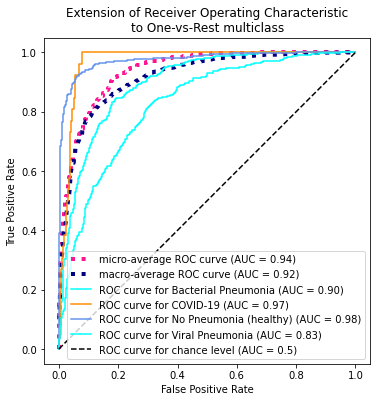

In [89]:
from itertools import cycle
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(len(classes)), colors):
    RocCurveDisplay.from_predictions(
        y_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {classes[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

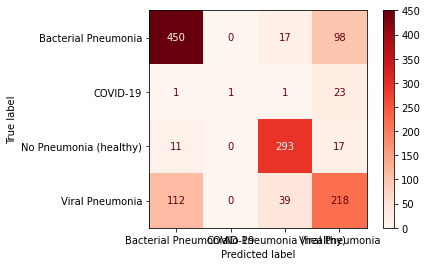

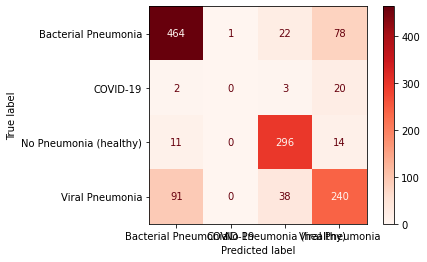

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

y_val_pred = t_model_1.predict(X_val, verbose=0)
y_test_pred = t_model_1.predict(X_test, verbose=0)

labels = classes
cm = confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds)
plt.show()

labels = classes 
cm = confusion_matrix(y_val.argmax(axis=1), y_val_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds)
plt.show()

# Transfer Learning

Utilize VGG16 or ResNet50 architecture for feature extraction. Freeze the layers until the fully connected layer such that these layers will not be updated through training. Add your fully connected layers (as many as you like) and present the results that you obtained on the test set (ROC curve with AUC score, performance measures and confusion matrix). Comment on the performance with respect to the baseline and the network that you designed in the previous step.

In [ ]:
# example of loading the resnet50 model
from keras.applications.resnet import ResNet50
# load model
resnet_model = ResNet50(include_top=False, input_shape=(156, 156, 3))
# summarize the model
resnet_model.summary()
# mark loaded layers as not trainable
for layer in resnet_model.layers:
	layer.trainable = False

In [ ]:
from tensorflow.keras import layers
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# add new classifier layers
#add flatten layer
flat1 = layers.Flatten()(resnet_model.layers[-1].output)
#add Dense layers
class1 = layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001))(flat1)
class2 = layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.001))(class1)
#add output layer with softmax activation
output = layers.Dense(4, activation="softmax")(class2)
# define new model
resnet_model = Model(inputs=resnet_model.inputs, outputs=output)

  # summarize
resnet_model.summary()

In [ ]:
resnet_model.compile(optimizer = "nadam", 
                         loss="categorical_crossentropy",
                         metrics=['accuracy']
                         )

In [ ]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)
resnet_hist = resnet_model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val), 
    verbose=1
)
history_dict_resnet = resnet_hist.history
history_dict_resnet.keys()

In [ ]:
print(history_dict_resnet)

In [ ]:
# testing ResNet50 transfer learning model
test_loss, test_acc = resnet_model.evaluate(X_test, y_test)
print(test_acc)

In [ ]:
resnet_model.save("./talos_models/resnet_model2")
np.save("./talos_models/resnet_model2.npy", history_dict_resnet) #saving

In [ ]:
# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16
# load model
vgg_model = VGG16(include_top=False, input_shape=(156, 156, 3))
# summarize the model
vgg_model.summary()
# mark loaded layers as not trainable
for layer in vgg_model.layers:
	layer.trainable = False

In [ ]:
# add new classifier layers
#add flatten layer
flat1 = layers.Flatten()(vgg_model.layers[-1].output)
#add Dense layers
class1 = layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001))(flat1)
class2 = layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.001))(class1)
#add output layer with softmax activation
output = layers.Dense(4, activation="softmax")(class2)
# define new model
vgg_model = Model(inputs=vgg_model.inputs, outputs=output)

  # summarize
vgg_model.summary()

In [ ]:
vgg_model.compile(optimizer = "nadam", 
                         loss="categorical_crossentropy",
                         metrics=['accuracy']
                         )

In [ ]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)
vgg_hist = vgg_model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val), 
    verbose=1
)
history_dict_vgg = vgg_hist.history
history_dict_vgg.keys()

In [ ]:
# testing VGG16 transfer learning model
test_loss, test_acc = vgg_model.evaluate(X_test, y_test)
print(test_acc)

In [ ]:
#saving
vgg_model.save("./talos_models/vgg_model2")
np.save("./talos_models/vgg_model2.npy", history_dict_vgg) 

In [ ]:
from keras.models import load_model
# baseline_model = load_model("./talos_models/baseline_model") #load the model
history_baseline_model=np.load('./talos_models/baseline_model.npy',allow_pickle='TRUE').item() #load teh hist dict

# t_model_1 = load_model("./talos_models/t_model_1") #load the model
history_tuned_model =np.load('./talos_models/final_tuned_model.npy',allow_pickle='TRUE').item() #load teh hist dict

# ResNet50 Transfer Learning Model
history_resnet_model =np.load('./talos_models/resnet_model2.npy',allow_pickle='TRUE').item() #load teh hist dict

#VGG16 Transfer Learning Model
history_vgg_model =np.load('./talos_models/vgg_model2.npy',allow_pickle='TRUE').item() #load teh hist dict

# # t_model_2 = load_model("./talos_models/t_model_2") #load the model
# history_t_model_2 =np.load('./talos_models/t_model_2.npy',allow_pickle='TRUE').item() #load teh hist dict

# # t_model_3 = load_model("./talos_models/t_model_3") #load the model
# history_t_model_3 =np.load('./talos_models/t_model_3.npy',allow_pickle='TRUE').item() #load teh hist dict

In [ ]:
model1 = history_baseline_model
model2 = history_tuned_model
model3 = history_resnet_model
model4 = history_vgg_model

baseline_val_accuracy = model1['val_accuracy']
tuned_model_val_accuracy = model2['val_accuracy']
resnet_model_val_accuracy = model3['val_accuracy']
vgg_model_val_accuracy = model4['val_accuracy']

plot_history(data_list=[baseline_val_accuracy, tuned_model_val_accuracy, resnet_model_val_accuracy, vgg_model_val_accuracy],
             label_list=['Baseline Validation accuracy','Tuned_Model', 'ResNet50', 'VGG16'],
             title='Comparison',
             ylabel='Validation accuracy')

In [ ]:
baseline_val_loss = model1['val_loss']
tuned_model_val_loss = model2['val_loss']
resnet_model_val_loss = model3['val_loss']
vgg_model_val_loss = model4['val_loss']
# tuned_1_model_val_loss = history_t_model_2['val_loss']
# tuned_2_model_val_loss = history_t_model_3['val_loss']


plot_history(data_list=[baseline_val_loss, tuned_model_val_loss, resnet_model_val_loss, vgg_model_val_loss],
             label_list=['Baseline Validation loss', 'Tuned_Model', 'ResNet50', 'VGG16'],
             title='Comparison',
             ylabel='Validation loss')

baseline_loss = model1['loss']
tuned_model_loss = model2['loss']
resnet_model_loss = model3['loss']
vgg_model_loss = model4['loss']
# tuned_1_model_loss = history_t_model_2['loss']
# tuned_2_model_loss = history_t_model_3['loss']


plot_history(data_list=[baseline_loss, tuned_model_loss, resnet_model_loss, vgg_model_loss],
             label_list=['Baseline Training loss',  'Tuned_Model', 'ResNet50', 'VGG16'],
             title='Comparison',
             ylabel='Training loss')

In [ ]:
%matplotlib inline

acc = model3['accuracy']
val_acc = model3['val_accuracy']
loss = model3['loss']
val_loss = model3['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')

In [ ]:
acc = model4['accuracy']
val_acc = model4['val_accuracy']
loss = model4['loss']
val_loss = model4['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')

In [ ]:
y_pred = resnet_model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

In [ ]:
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(len(classes)):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= len(classes)

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

In [ ]:
from itertools import cycle
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(len(classes)), colors):
    RocCurveDisplay.from_predictions(
        y_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {classes[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

y_val_pred = resnet_model.predict(X_val, verbose=0)
y_test_pred = resnet_model.predict(X_test, verbose=0)

labels = classes
cm = confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds)
plt.show()

labels = classes 
cm = confusion_matrix(y_val.argmax(axis=1), y_val_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds)
plt.show()

In [ ]:
y_pred = vgg_model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

In [ ]:
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(len(classes)):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= len(classes)

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

In [ ]:
from itertools import cycle
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(len(classes)), colors):
    RocCurveDisplay.from_predictions(
        y_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {classes[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()